In [1]:
from datetime import datetime
import os
import re
import uuid

import h5py as h5
import matplotlib.pyplot as plt
import numpy as np

import datajoint as dj
from pipeline import reference, subject, acquisition, stimulation #, behavior, ephys, action
from pipeline.helper_functions import parse_prefix

Connecting root@127.0.0.1:3306


Query raw whole-cell recording

In [3]:
cell_keys = acquisition.Cell.fetch(dj.key)

In [8]:
cell_key = cell_keys[0]
print(cell_key)

{'subject_id': 'ANM300476', 'session_time': datetime.datetime(2017, 5, 20, 18, 28, 59), 'cell_id': 'cell_20_1'}


In [13]:
Vm, Vm_wo_spike, timestamps = (acquisition.IntracellularAcquisition.MembranePotential & cell_key).fetch1(
    'membrane_potential',
    'membrane_potential_wo_spike',
    'membrane_potential_time_stamps')

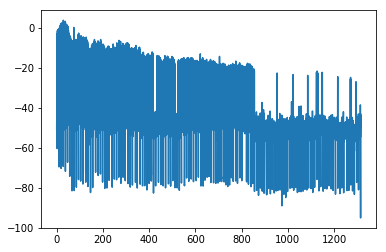

In [16]:
plt.plot(timestamps,Vm)